In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('eda_data.csv')
dataset.head()

,Unnamed: 0,Revenue,Company Name,Sector,Salary Estimate,Location,Type of Ownership,Industry,Job Title,Founded,...,annual_minimum_salary,maximum_salary,annual_maximum_salary,average_salary,parsed_location,state,parsed_year,company_age,description_length,parsed_job_title
0,0,-1,Newsly Technologies,-1,Employer Provided Salary:$72 - $77 Per Hour,United States,-1,-1,Data Scientist,-1,...,149760,77,160160,154960.0,"United States, Any",Any,-1,-1,683,data scientist
1,1,-1,Facebook,-1,Employer Provided Salary:$150K,Remote,-1,-1,"Data Scientist, Analytics",-1,...,150000,150,150000,150000.0,Remote,Remote,-1,-1,867,"data scientist, analytics"
2,2,-1,McKinsey & Company,-1,Employer Provided Salary:$29 - $34 Per Hour,-1,-1,-1,Junior Data Engineer - QuantumBlack,-1,...,60320,34,70720,65520.0,-1,-1,-1,-1,746,junior data engineer - quantumblack
3,3,-1,Facebook,Unknown / Non-Applicable,Employer Provided Salary:$60K,Remote,IT Services,Information Technology,"Data Scientist, Analytics-Remote Presence",-1,...,60000,60,60000,60000.0,Remote,Remote,-1,-1,508,"data scientist, analytics-remote presence"
4,4,$10+ billion (USD),Pacific Northwest National Laboratory,Retail,Employer Provided Salary:$91K - $145K,"Richland, WA",Subsidiary or Business Segment,General Merchandise & Superstores,Data Scientist,1983,...,91000,145,145000,118000.0,"Richland, WA",WA,1983,38,917,data scientist


## To Do list:
    1. Choose relevant columns
    2. Get dummy data
    3. Train test split
    4. Multiple Linear Regression, Lasso Regression (Dataset will be so sparsed with dummy variables, this actually helps us to normalize that), Random Forest (Tree based model to comapre with linear model)
    5. Tune Models created using GridSearchCV
    6. Test ensembles

## 1. Choose relevant columns

In [3]:
dataset.columns

Index(['Unnamed: 0', 'Revenue', 'Company Name', 'Sector', 'Salary Estimate',
       'Location', 'Type of Ownership', 'Industry', 'Job Title', 'Founded',
       'Rating', 'Job Description', 'Size', 'parsed_salary',
       'per_hour_salary_jobs', 'fixed_salary_jobs', 'minimum_salary',
       'annual_minimum_salary', 'maximum_salary', 'annual_maximum_salary',
       'average_salary', 'parsed_location', 'state', 'parsed_year',
       'company_age', 'description_length', 'parsed_job_title'],
      dtype='object')

In [4]:
dataset_model = dataset[['Revenue', 'Sector', 'Industry', 'Type of Ownership', 'Size', 'per_hour_salary_jobs', 'fixed_salary_jobs', 'state', 'company_age', 'parsed_job_title', 'average_salary']]
dataset_model.head()

,Revenue,Sector,Industry,Type of Ownership,Size,per_hour_salary_jobs,fixed_salary_jobs,state,company_age,parsed_job_title,average_salary
0,-1,-1,-1,-1,-1,1,0,Any,-1,data scientist,154960.0
1,-1,-1,-1,-1,-1,0,1,Remote,-1,"data scientist, analytics",150000.0
2,-1,-1,-1,-1,-1,1,0,-1,-1,junior data engineer - quantumblack,65520.0
3,-1,Unknown / Non-Applicable,Information Technology,IT Services,501 to 1000 Employees,0,1,Remote,-1,"data scientist, analytics-remote presence",60000.0
4,$10+ billion (USD),Retail,General Merchandise & Superstores,Subsidiary or Business Segment,10000+ Employees,0,1,WA,38,data scientist,118000.0


## 2. Get dummy data

In [5]:
dataset_model.dtypes

Revenue                  object
Sector                   object
Industry                 object
Type of Ownership        object
Size                     object
per_hour_salary_jobs      int64
fixed_salary_jobs         int64
state                    object
company_age               int64
parsed_job_title         object
average_salary          float64
dtype: object

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
dataset_dummies = pd.get_dummies(dataset_model)
print(dataset_dummies.shape)
dataset_dummies.head()


(888, 183)


,per_hour_salary_jobs,fixed_salary_jobs,company_age,average_salary,Revenue_$1 to $2 billion (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Sector_-1,Sector_Accounting & Legal,Sector_Biotech & Pharmaceuticals,Sector_Business Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,"Sector_Oil, Gas, Energy & Utilities",Sector_Retail,Sector_Telecommunications,Sector_Unknown / Non-Applicable,Industry_$25 to $50 million (USD),Industry_-1,Industry_Accounting,Industry_Biotech & Pharmaceuticals,Industry_Business Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Consumer Products Manufacturing,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_General Merchandise & Superstores,Industry_Grocery Stores & Supermarkets,Industry_Health Care Services & Hospitals,Industry_IT Services,Industry_Information Technology,Industry_Insurance Agencies & Brokerages,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_Oil & Gas Exploration & Production,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Type of Ownership_-1,Type of Ownership_Advertising & Marketing,Type of Ownership_College / University,Type of Ownership_Company - Private,Type of Ownership_Company - Public,Type of Ownership_Computer Hardware & Software,Type of Ownership_Government,Type of Ownership_IT Services,Type of Ownership_School / School District,Type of Ownership_Subsidiary or Business Segment,Type of Ownership_Unknown / Non-Applicable,Size_-1,Size_1 to 50 Employees,Size_10000+ Employees,Size_1001 to 5000 Employees,Size_201 to 500 Employees,Size_5001 to 10000 Employees,Size_501 to 1000 Employees,Size_51 to 200 Employees,state_ AZ,state_ Any,state_ CA,state_ CO,state_ DC,state_ IL,state_ KY,state_ LA,state_ MA,state_ ME,state_ MI,state_ MN,state_ NC,state_ NY,state_ OH,state_ OR,state_ PA,state_ TN,state_ TX,state_ VA,state_ VI,state_ WA,state_-1,state_Remote,"parsed_job_title_1398-python developer-machine learning, new york, ny",parsed_job_title_2021 data analytics and innovation co-op,parsed_job_title_ai engineer - hux,parsed_job_title_applied research scientist (university grad),parsed_job_title_assessment engineer (storage and data protection),parsed_job_title_associate - engg5242699,parsed_job_title_avail - staff data scientist (remote home based worker),parsed_job_title_azure data engineer,"parsed_job_title_backend engineer, data science platform",parsed_job_title_chief data and analytics officer-20237,parsed_job_title_clinical data scientist,parsed_job_title_content developer 1,"parsed_job_title_customer engineer, data & ai",parsed_job_title_data & applied scientist,parsed_job_title_data analytics engineer,parsed_job_title_data analytics statistical research specialist-20197,parsed_job_title_data engineer,parsed_job_title_data engineer (remote 667-1),"parsed_job_title_data engineer, analytics (product specialist)","parsed_job_title_data engineer, product analytics",parsed_job_title_data engineer/data science engineer,parsed_job_title_data science,parsed_job_title_data science (100% remote),parsed_job_title_data science content developer,parsed_job_title_data science engineer,parsed_job_title_data science manager,parsed_job_title_data science tutors,parsed_job_title_data scientist,"parsed_job_title_data scientist ($103,000/yr)",parsed_job_titl

## 3. Train test split

In [8]:
from sklearn.model_selection import train_test_split

X = dataset_dummies.drop('average_salary', axis=1)
y = dataset_dummies.average_salary.values # .values creates an array instead of series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## 4.1 Multiple Linear Regression (statsmodel)

In [9]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X) # .add_constant() -> In stats model we have to create a constant to use X in model. constant is nothing but a column of 1 (constant is 'b')
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     3.612
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.09e-30
Time:                        16:00:26   Log-Likelihood:                -10274.
No. Observations:                 888   AIC:                         2.085e+04
Df Residuals:                     739   BIC:                         2.156e+04
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================================
                                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                         7.289e+04   6148.606     11.854      0.000    6.08e+04     8.5e+04
per_hour_salary_jobs                                                                          5.023e+04   4218.327     11.907      0.000    4.19e+04    5.85e+04
fixed_salary_jobs                                                                             2.266e+04   5155.526      4.395      0.000    1.25e+04    3.28e+04
company_age                                                                                      8.7192     69.930      0.125      0.901    -128.566     146.005
Revenue_$1 to $2 billion (USD)                                                               -3.152e+04   9159.352     -3.441      0.001   -4.95e+04   -1.35e+04
Revenue_$10 to $25 million (USD)                                                             -2.278e+04   2.25e+04     -1.012      0.312    -6.7e+04    2.14e+04
Revenue_$10+ billion (USD)                                                                    1.104e+04   6418.725      1.720      0.086   -1557.872    2.36e+04
Revenue_$100 to $500 million (USD)                                                           -1.522e+04   2.75e+04     -0.553      0.581   -6.93e+04    3.88e+04
Revenue_$2 to $5 billion (USD)                                                               -1941.2922   1.42e+04     -0.137      0.891   -2.98e+04    2.59e+04
Revenue_$25 to $50 million (USD)                                                             -6581.0857   1.22e+04     -0.541      0.589   -3.05e+04    1.73e+04
Revenue_$5 to $10 billion (USD)                                                               3.119e+04    1.3e+04      2.407      0.016    5749.931    5.66e+04
Revenue_$50 to $100 million (USD)                                                             4.337e+04    2.1e+04      2.065      0.039    2139.729    8.46e+04
Revenue_$500 million to $1 billion (USD)                                                      1.073e+04   1.73e+04      0.619      0.536   -2.33e+04    4.48e+04
Revenue_-1                                                                                    1.354e+04   7237.039      1.872      0.062    -662.731    2.78e+04
Revenue_Less than $1 million (USD)                                                            3.529e+04   2.89e+04      1.220      0.223   -2.15e+04    9.21e+04
Revenue_Unknown / Non-Applicable                                                              5755.9709   6581.350      0.875      0.382   -7164.400    1.87e+04
Sector_-1               

In [10]:
X_sm.head()

,const,per_hour_salary_jobs,fixed_salary_jobs,company_age,Revenue_$1 to $2 billion (USD),Revenue_$10 to $25 million (USD),Revenue_$10+ billion (USD),Revenue_$100 to $500 million (USD),Revenue_$2 to $5 billion (USD),Revenue_$25 to $50 million (USD),Revenue_$5 to $10 billion (USD),Revenue_$50 to $100 million (USD),Revenue_$500 million to $1 billion (USD),Revenue_-1,Revenue_Less than $1 million (USD),Revenue_Unknown / Non-Applicable,Sector_-1,Sector_Accounting & Legal,Sector_Biotech & Pharmaceuticals,Sector_Business Services,Sector_Education,Sector_Finance,Sector_Government,Sector_Health Care,Sector_Information Technology,Sector_Insurance,Sector_Manufacturing,"Sector_Oil, Gas, Energy & Utilities",Sector_Retail,Sector_Telecommunications,Sector_Unknown / Non-Applicable,Industry_$25 to $50 million (USD),Industry_-1,Industry_Accounting,Industry_Biotech & Pharmaceuticals,Industry_Business Services,Industry_Colleges & Universities,Industry_Computer Hardware & Software,Industry_Consulting,Industry_Consumer Products Manufacturing,Industry_Education Training Services,Industry_Electrical & Electronic Manufacturing,Industry_Energy,Industry_Enterprise Software & Network Solutions,Industry_Federal Agencies,Industry_Financial Analytics & Research,Industry_General Merchandise & Superstores,Industry_Grocery Stores & Supermarkets,Industry_Health Care Services & Hospitals,Industry_IT Services,Industry_Information Technology,Industry_Insurance Agencies & Brokerages,Industry_Internet,Industry_Investment Banking & Asset Management,Industry_Oil & Gas Exploration & Production,Industry_Staffing & Outsourcing,Industry_State & Regional Agencies,Industry_Telecommunications Services,Industry_Transportation Equipment Manufacturing,Type of Ownership_-1,Type of Ownership_Advertising & Marketing,Type of Ownership_College / University,Type of Ownership_Company - Private,Type of Ownership_Company - Public,Type of Ownership_Computer Hardware & Software,Type of Ownership_Government,Type of Ownership_IT Services,Type of Ownership_School / School District,Type of Ownership_Subsidiary or Business Segment,Type of Ownership_Unknown / Non-Applicable,Size_-1,Size_1 to 50 Employees,Size_10000+ Employees,Size_1001 to 5000 Employees,Size_201 to 500 Employees,Size_5001 to 10000 Employees,Size_501 to 1000 Employees,Size_51 to 200 Employees,state_ AZ,state_ Any,state_ CA,state_ CO,state_ DC,state_ IL,state_ KY,state_ LA,state_ MA,state_ ME,state_ MI,state_ MN,state_ NC,state_ NY,state_ OH,state_ OR,state_ PA,state_ TN,state_ TX,state_ VA,state_ VI,state_ WA,state_-1,state_Remote,"parsed_job_title_1398-python developer-machine learning, new york, ny",parsed_job_title_2021 data analytics and innovation co-op,parsed_job_title_ai engineer - hux,parsed_job_title_applied research scientist (university grad),parsed_job_title_assessment engineer (storage and data protection),parsed_job_title_associate - engg5242699,parsed_job_title_avail - staff data scientist (remote home based worker),parsed_job_title_azure data engineer,"parsed_job_title_backend engineer, data science platform",parsed_job_title_chief data and analytics officer-20237,parsed_job_title_clinical data scientist,parsed_job_title_content developer 1,"parsed_job_title_customer engineer, data & ai",parsed_job_title_data & applied scientist,parsed_job_title_data analytics engineer,parsed_job_title_data analytics statistical research specialist-20197,parsed_job_title_data engineer,parsed_job_title_data engineer (remote 667-1),"parsed_job_title_data engineer, analytics (product specialist)","parsed_job_title_data engineer, product analytics",parsed_job_title_data engineer/data science engineer,parsed_job_title_data science,parsed_job_title_data science (100% remote),parsed_job_title_data science content developer,parsed_job_title_data science engineer,parsed_job_title_data science manager,parsed_job_title_data science tutors,parsed_job_title_data scientist,"parsed_job_title_data scientist ($103,000/yr)",parsed_job_title_data sc

## 4.1 Multiple Linear Regression (sklearn)

In [11]:
from sklearn.linear_model import LinearRegression

# It takes samples from the models and pull a sample and evaluate on the validation set to tell if the model generalizes it or not.
# This again takes a mini train test split and helps us to see how the model is performing in reality.
from sklearn.model_selection import cross_val_score 


lm = LinearRegression()
lm.fit(X_train, y_train)

# neg_mean_absolute_error -> Shows how far we are off of our general prediction.
print(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))


[-1.41972626e+13 -2.47248527e+04 -3.67294875e+13]


-16975583386949.406

## 4.2 Lasso Regression (Normalization term is 'alpha'. If alpha is 0 then it is Multiple Linear Regression, increase alpha, it increases the amount that the data is smooth)

In [12]:
from sklearn.linear_model import Lasso
lm_l = Lasso(max_iter=5000)
lm_l.fit(X, y)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

-26599.23055349398

C:\Users\neere\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1743794814.9822083, tolerance: 43285472.34628019
  positive)
C:\Users\neere\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34310695122.139984, tolerance: 52659555.7384541
  positive)
C:\Users\neere\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3456300905.2324524, tolerance: 51321186.95700484
  positive)
C:\Users\neere\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

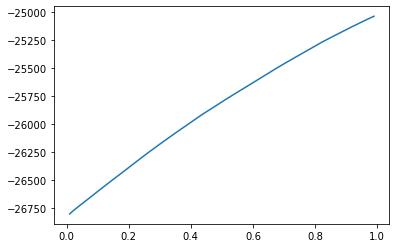

In [13]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/10), max_iter=10000)
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))

plt.plot(alpha, error)

In [14]:
err = tuple(zip(alpha, error))
err

((0.01, -26799.499157154612),
 (0.02, -26774.614250846193),
 (0.03, -26751.978569612107),
 (0.04, -26729.58419360827),
 (0.05, -26708.305746756963),
 (0.06, -26686.53624359802),
 (0.07, -26664.85297037786),
 (0.08, -26643.208845048193),
 (0.09, -26621.186612870457),
 (0.1, -26599.23055349398),
 (0.11, -26577.858064980883),
 (0.12, -26556.133047516112),
 (0.13, -26534.390854730824),
 (0.14, -26512.806450002812),
 (0.15, -26491.641216960536),
 (0.16, -26470.458199841858),
 (0.17, -26449.468354346896),
 (0.18, -26428.289789635794),
 (0.19, -26406.963382773698),
 (0.2, -26385.5596034823),
 (0.21, -26364.178951789512),
 (0.22, -26342.77179624053),
 (0.23, -26321.364513314784),
 (0.24, -26299.98570811297),
 (0.25, -26278.624664643183),
 (0.26, -26258.02388356531),
 (0.27, -26237.676964525424),
 (0.28, -26217.409990912693),
 (0.29, -26197.096931230913),
 (0.3, -26176.785938513156),
 (0.31, -26156.786132994403),
 (0.32, -26136.883479074415),
 (0.33, -26117.064169216683),
 (0.34, -26097.4183445

In [15]:
dataset_error = pd.DataFrame(err, columns=['alpha', 'error'])

dataset_error[dataset_error.error == max(dataset_error.error)] # With OLS = -26599.23055349398, with Lasso Regression = -25033.597885

,alpha,error
98,0.99,-25033.597885


## 4.3 Random Forest (Tree based model to comapre with linear model)

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

print(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))
np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

[-24472.9989625  -18035.6820206  -20516.67295403]


-21105.41189623599

## 5. Tune Models created using GridSearchCV 

In [17]:
# Model takes around 10-15mins

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': range(10, 300, 10), 'criterion':('mse', 'mae'), 'max_features':('auto', 'sqrt', 'log2')}

gs = GridSearchCV(rf, parameters, scoring='neg_mean_absolute_error', cv=3)
gs.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [18]:
print(gs.best_score_)
print(gs.best_estimator_)

-17685.096388313777
RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=280)


## 6. Test ensembles

In [21]:
test_pred_lm = lm.predict(X_test)
# test_pred_lml = lm_l.predict(X_test)
test_pred_rf = gs.best_estimator_.predict(X_test)

In [23]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, test_pred_lm))
# mean_absolute_error(y_test, test_pred_lml)
print(mean_absolute_error(y_test, test_pred_rf))


334158725637.49066
15578.873729266987


In [24]:
mean_absolute_error(y_test, (test_pred_lm+test_pred_rf)/2)

167079369560.80618

## Productioning model

In [27]:
import pickle
pick1 = {'model': gs.best_estimator_}
pickle.dump(pick1, open('model_file' + '.p', 'wb'))

file_name = 'model_file.p'
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']



In [28]:
model.predict(X_test.iloc[1, :].values.reshape(1, -1)) # To check the whether the model is working or not. This is done on known results.

array([109734.85714286])

In [44]:
list(X_test.iloc[1, :]) # copy and paste it in data_input.py file

[1,
 0,
 -1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]